In [73]:
import pandas as pd

# Adjust the file path as needed
file_path = '/Users/taief/Desktop/MusicTry/data_by_artist.csv'
data_by_artist = pd.read_csv(file_path)

data_by_artist.head()


mode  count  acousticness  \
0     1      9      0.590111   
1     1     26      0.862538   
2     1      7      0.856571   
3     1     27      0.884926   
4     1      7      0.510714   

                                             artists  danceability  \
0                   "Cats" 1981 Original London Cast      0.467222   
1                          "Cats" 1983 Broadway Cast      0.441731   
2        "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   

     duration_ms    energy  instrumentalness  liveness   loudness  \
0  250318.555556  0.394003          0.011400  0.290833 -14.448000   
1  287280.000000  0.406808          0.081158  0.315215 -10.690000   
2  328920.000000  0.286571          0.024593  0.325786 -15.230714   
3  262890.962963  0.245770          0.073587  0.275481 -15.639370   
4  270436.142857  0.488286          0.009400  0.195000 -10.236714   

   speechiness       tempo   valence  popularity  key  
0     0.210389  117.518111  0.389500   38.333333    5  
1     0.176212  103.044154  0.268865   30.576923    5  
2     0.118514   77.375857  0.354857   34.857143    0  
3     0.123200   88.667630  0.372030   34.851852    0  
4     0.098543  122.835857  0.482286   43.000000    5

In [74]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecting the features to use for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
data_selected = data_by_artist[features]

# Dropping rows with missing values
data_clean = data_selected.dropna()

# Data normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Convert the scaled data back to a DataFrame (optional, for convenience)
data_scaled_df = pd.DataFrame(data_scaled, columns=features)


Number of components selected to retain 90% variance: 8
[0.36728676 0.13811385 0.11115996 0.09826937 0.0814637  0.07779569
 0.05462636 0.03242449]


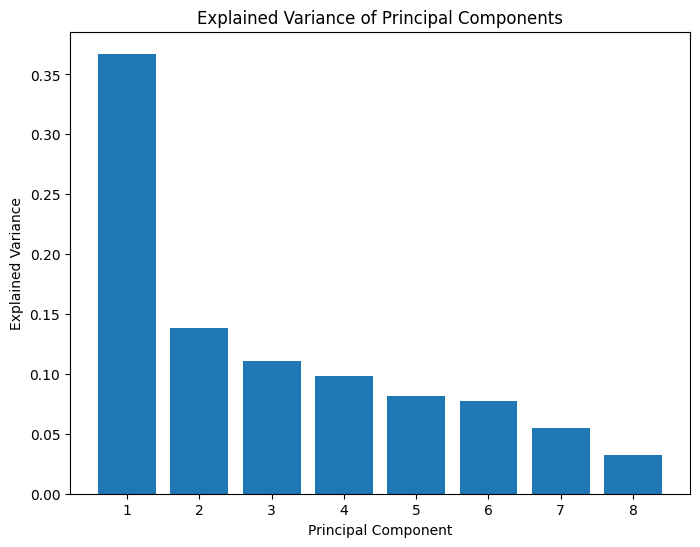

cumulative_variance [0.36728676 0.50540061 0.61656058 0.71482994 0.79629364 0.87408933
 0.92871569 0.96114019]


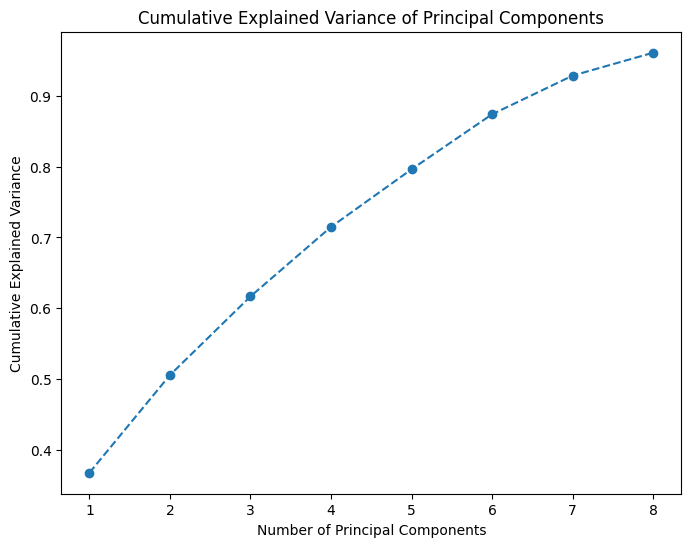

<Figure size 640x480 with 0 Axes>

In [75]:
from sklearn.decomposition import PCA


# Step 1: PCA for Dimensionality Reduction to retain 90% of the variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled_df)

# Number of components selected to retain 90% variance
print(f"Number of components selected to retain 90% variance: {pca.n_components_}")

#print variance
print(pca.explained_variance_ratio_)

# Create a bar plot of the explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

#cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(f'cumulative_variance',cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/cumulative_explained_variance.png')

Number of components | Cumulative Variance Explained
----------------------|-------------------------------
         1           | 36.73%
         2           | 50.54%
         3           | 61.66%
         4           | 71.48%
         5           | 79.63%
         6           | 87.41%
         7           | 92.87%
         8           | 96.11%


     acousticness  danceability    energy  instrumentalness  liveness  \
PC1      0.428414     -0.354736 -0.453885          0.278531 -0.005148   
PC2      0.272437      0.313100 -0.118909         -0.176679  0.342488   
PC3     -0.143962     -0.372427  0.192651         -0.076592  0.750739   
PC4     -0.100370      0.193379 -0.126444         -0.181039 -0.264167   
PC5     -0.005732     -0.032423 -0.112487          0.044264 -0.220390   
PC6     -0.215085      0.169418  0.237991          0.889948  0.059347   
PC7      0.118985      0.239681 -0.268230          0.057068  0.408140   
PC8     -0.141335      0.683219 -0.222130          0.008449  0.169412   

     loudness  speechiness     tempo   valence  popularity  
PC1 -0.444135    -0.083926 -0.203058 -0.286706   -0.281557  
PC2 -0.023340     0.543810 -0.129259  0.415094   -0.424038  
PC3  0.090384     0.212216 -0.063233 -0.407239    0.104573  
PC4 -0.108045     0.392158 -0.647661 -0.264513    0.423191  
PC5 -0.198871     0.598182  0.678867 

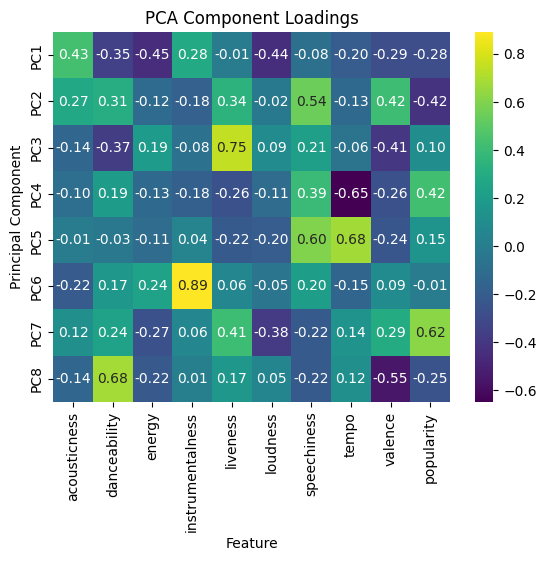

<Figure size 640x480 with 0 Axes>

In [76]:
import pandas as pd
import seaborn as sns

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame for better visualization
components_df = pd.DataFrame(pca_components, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the DataFrame for interpretation
print(components_df)

sns.heatmap(components_df, cmap='viridis', annot=True, fmt=".2f")
plt.title("PCA Component Loadings")
plt.ylabel("Principal Component")
plt.xlabel("Feature")
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/pca_component_loadings.png')


In [77]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def hopkins_statistic(X):
    n, d = X.shape
    m = int(0.1 * n)  # Using 10% of the data for the test as a common practice
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = np.random.uniform(X.min(axis=0), X.max(axis=0), (m, d))
    u_dist = np.sum(nbrs.kneighbors(rand_X, return_distance=True)[0])
    w_dist = np.sum(nbrs.kneighbors(X, n_neighbors=2, return_distance=True)[0][:, 1])
    
    H = u_dist / (u_dist + w_dist)
    return H

H = hopkins_statistic(data_pca)
print(f"Hopkins Statistic: {H:.2f}")


Hopkins Statistic: 0.44


For n_clusters = 2, the silhouette score is: 0.280071236827149
For n_clusters = 3, the silhouette score is: 0.22642071568868638
For n_clusters = 4, the silhouette score is: 0.21519665793412174
For n_clusters = 5, the silhouette score is: 0.15215766871166553
For n_clusters = 6, the silhouette score is: 0.1587425686842528
For n_clusters = 7, the silhouette score is: 0.1512510015261671
For n_clusters = 8, the silhouette score is: 0.16240199974187075
For n_clusters = 9, the silhouette score is: 0.1622155235018904
For n_clusters = 10, the silhouette score is: 0.16995636926333257


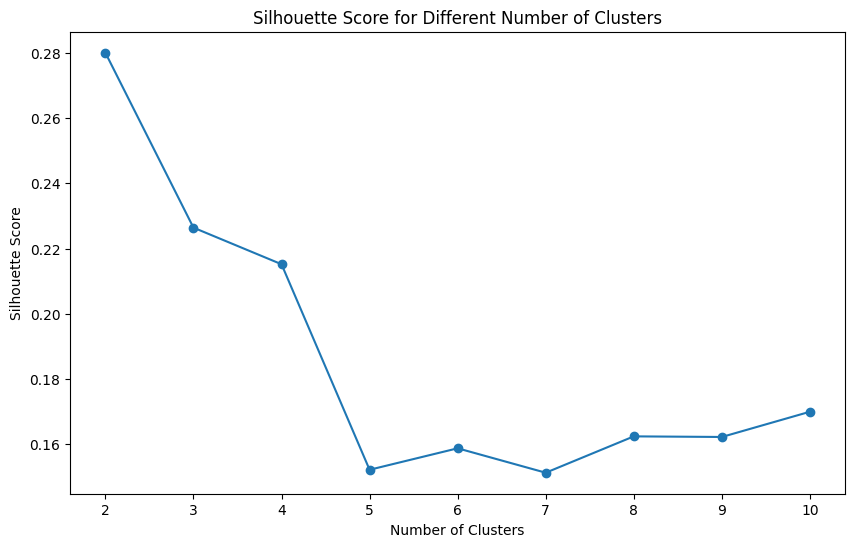

The optimal number of clusters is: 2


<Figure size 640x480 with 0 Axes>

In [78]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of possible clusters to evaluate
range_n_clusters = list(range(2, 11))

silhouette_scores_Kmeans = []  

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_pca)  # Use PCA-reduced data
    
    # Calculate the silhouette score and append to list
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    silhouette_scores_Kmeans.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_Kmeans, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_clusters = range_n_clusters[silhouette_scores_Kmeans.index(max(silhouette_scores_Kmeans))]
print(f"The optimal number of clusters is: {optimal_clusters}")

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_kmeans.png')

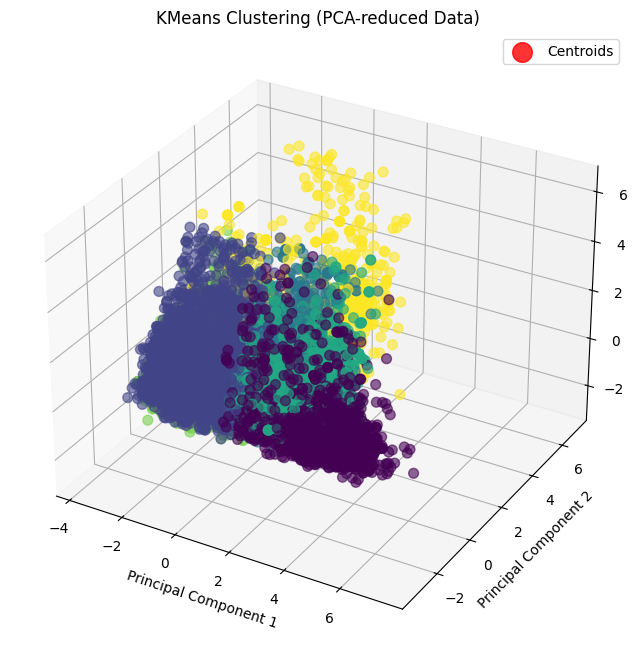

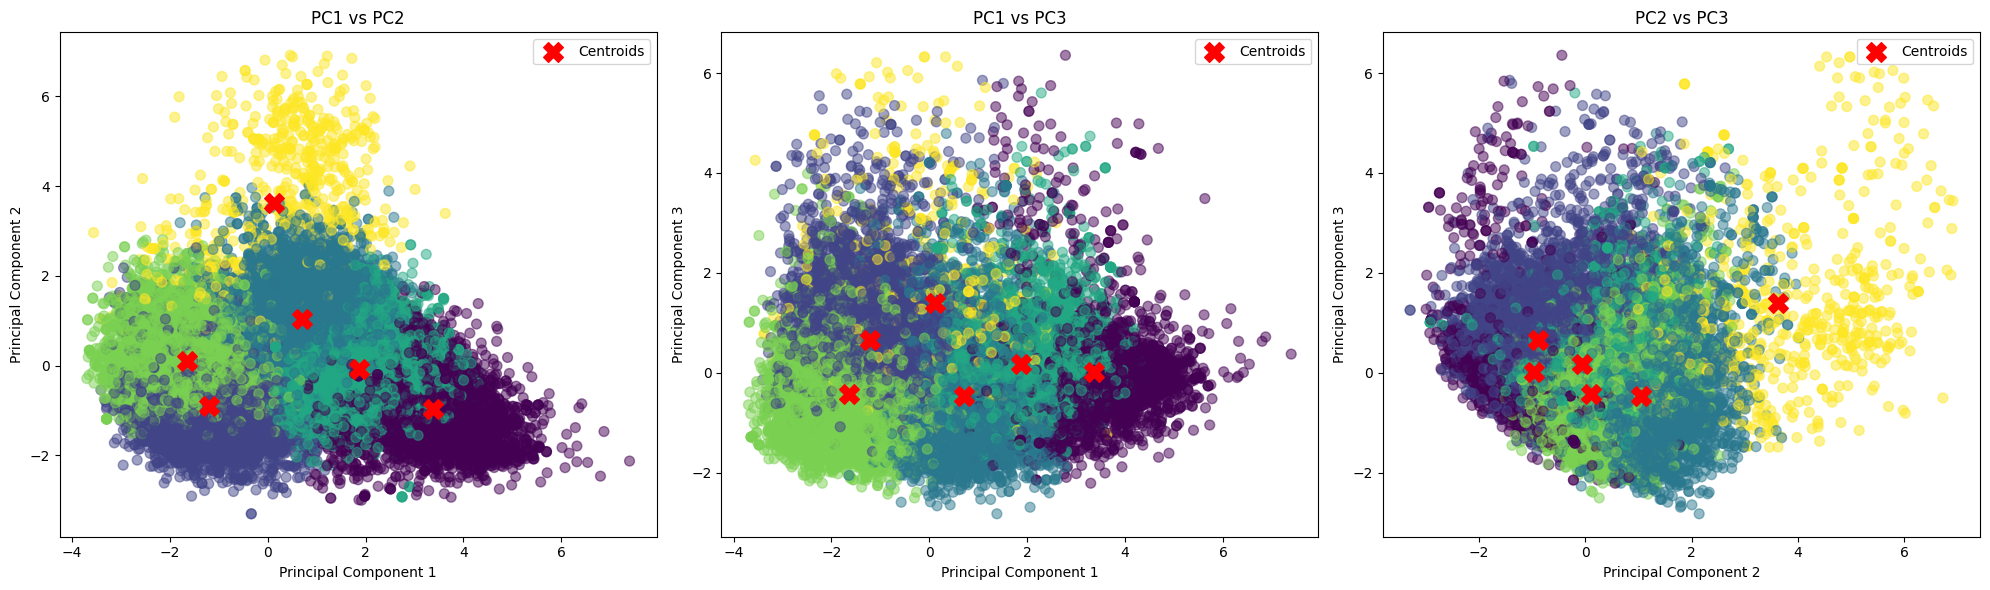

<Figure size 640x480 with 0 Axes>

In [79]:
from mpl_toolkits.mplot3d import Axes3D

optimal_n_clusters = 6
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=10)
kmeans_labels = kmeans.fit_predict(data_pca)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                     c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)

# Plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           c='red', s=200, alpha=0.8, label='Centroids')

ax.set_title('KMeans Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

# Assuming 'kmeans' is your fitted KMeans model with the 'kmeans_labels' and 'data_pca' as before

# Create a figure with subplots in a 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Centroids for the principal components
centroids = kmeans.cluster_centers_

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[1].scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')
axs[1].legend()

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[2].scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')
axs[2].legend()

# Display the plots
plt.tight_layout()
plt.show()


#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/kmeans_clustering.png')

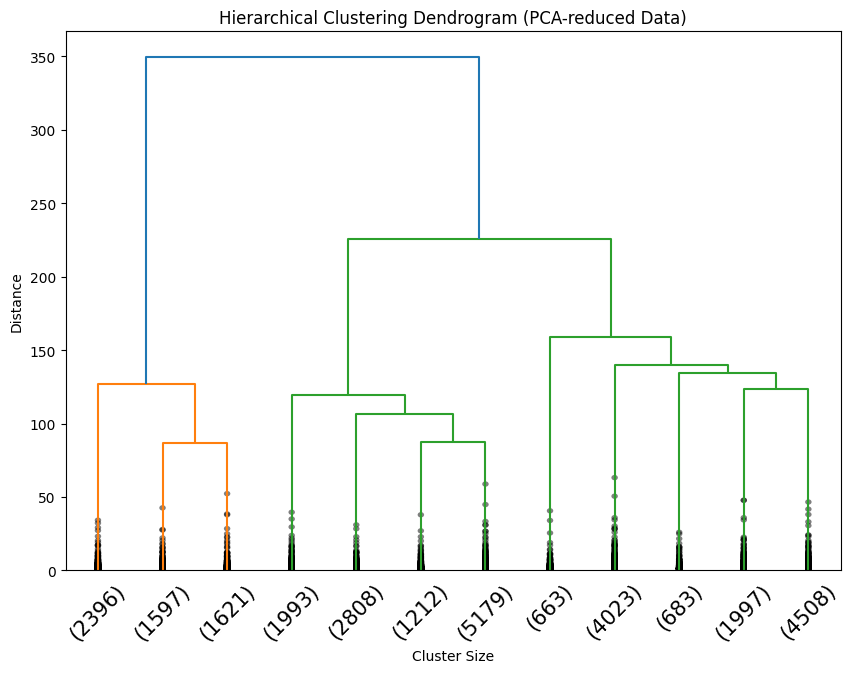

<Figure size 640x480 with 0 Axes>

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 2: Perform Hierarchical Clustering on the PCA-reduced data
Z_ward = linkage(data_pca, method='ward')

# Step 3: Plot the Hierarchical Clustering Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (PCA-reduced Data)')
dendrogram(Z_ward, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram.png')

For n_clusters = 2, the silhouette score is: 0.27163317048620556
For n_clusters = 3, the silhouette score is: 0.1477521480300336
For n_clusters = 4, the silhouette score is: 0.1494823424987698
For n_clusters = 5, the silhouette score is: 0.12400664131220007
For n_clusters = 6, the silhouette score is: 0.11980184365276911
For n_clusters = 7, the silhouette score is: 0.11283472914994239
For n_clusters = 8, the silhouette score is: 0.10727584488984311
For n_clusters = 9, the silhouette score is: 0.10971749298205984
For n_clusters = 10, the silhouette score is: 0.09178177063707377


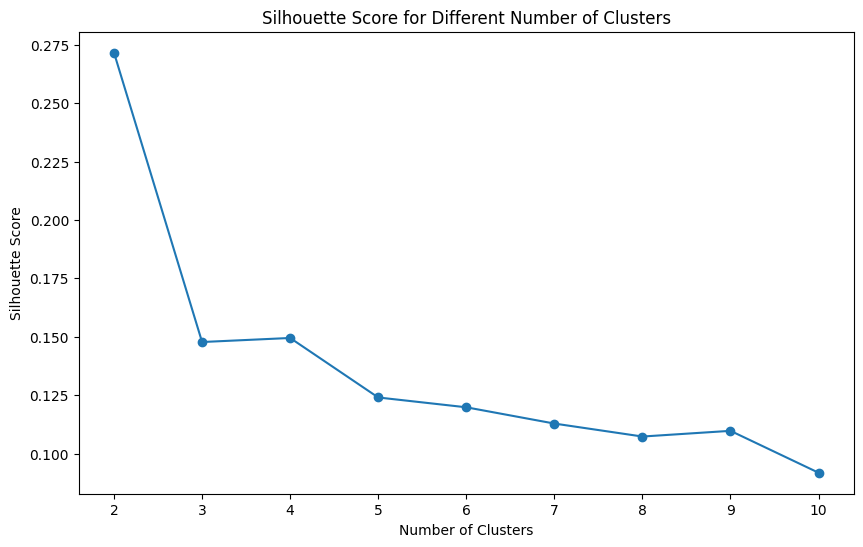

<Figure size 640x480 with 0 Axes>

In [81]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Initialize a list to store the silhouette scores
silhouette_scores_ward = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_ward, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_ward.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_ward, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11)) 
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


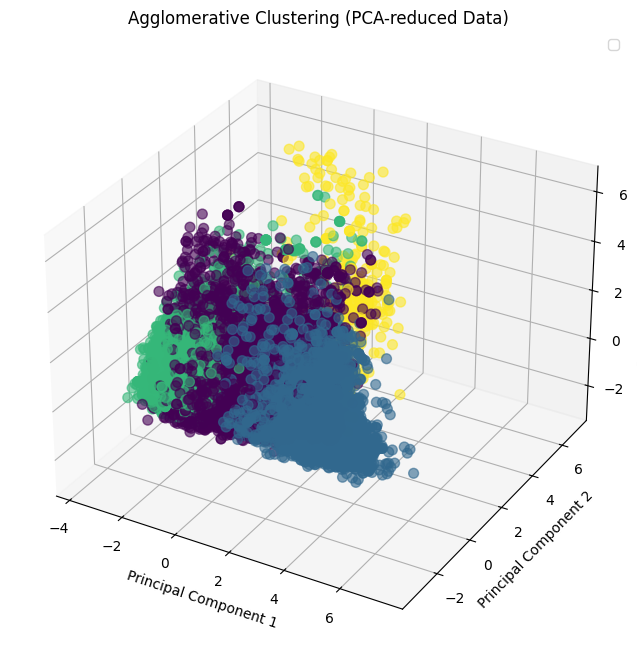

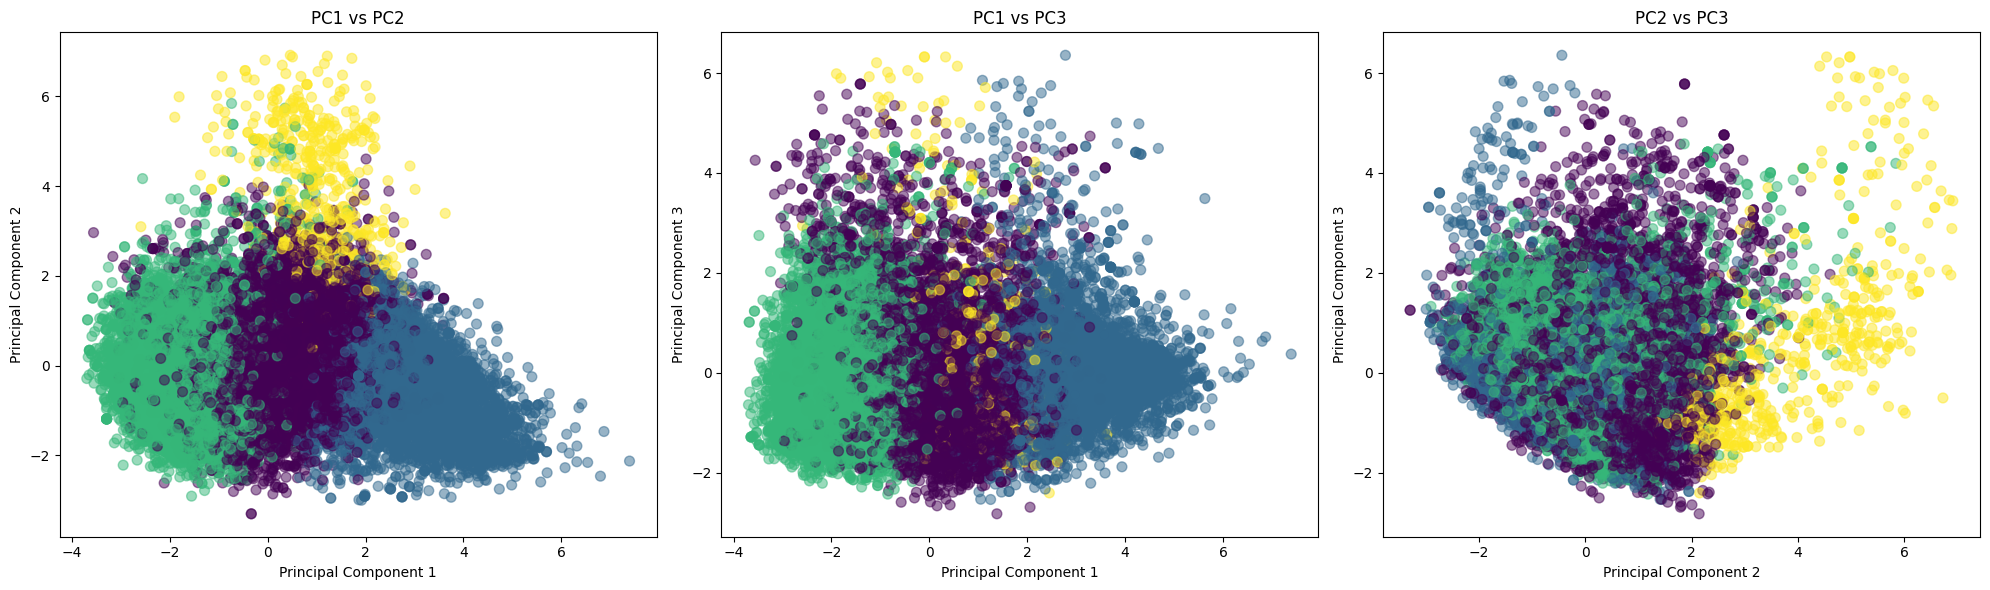

<Figure size 640x480 with 0 Axes>

In [82]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 4

# Performing Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_cluster.fit_predict(data_pca)

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                     c=agg_labels, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering.png')

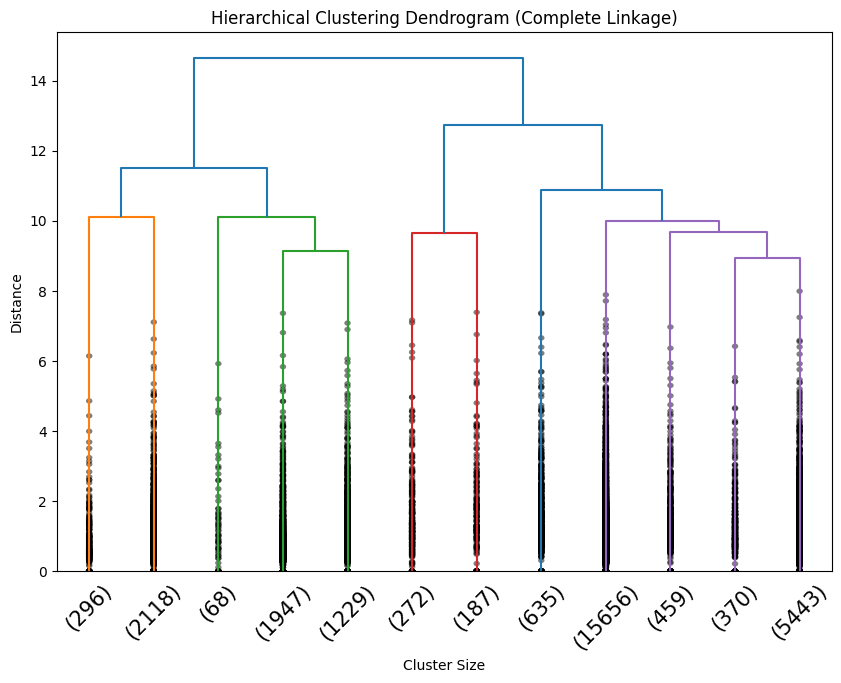

<Figure size 640x480 with 0 Axes>

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering with 'complete' linkage
Z_complete = linkage(data_pca, method='complete')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
dendrogram(Z_complete, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram_complete.png')

For n_clusters = 2, the silhouette score is: 0.24097209818220042
For n_clusters = 3, the silhouette score is: 0.25135707315975725
For n_clusters = 4, the silhouette score is: 0.19005354778330236
For n_clusters = 5, the silhouette score is: 0.1678498039140727
For n_clusters = 6, the silhouette score is: 0.16318272697720282
For n_clusters = 7, the silhouette score is: 0.1499810876785281
For n_clusters = 8, the silhouette score is: 0.04530763078428023
For n_clusters = 9, the silhouette score is: 0.037344095538409096
For n_clusters = 10, the silhouette score is: 0.038253561758818506


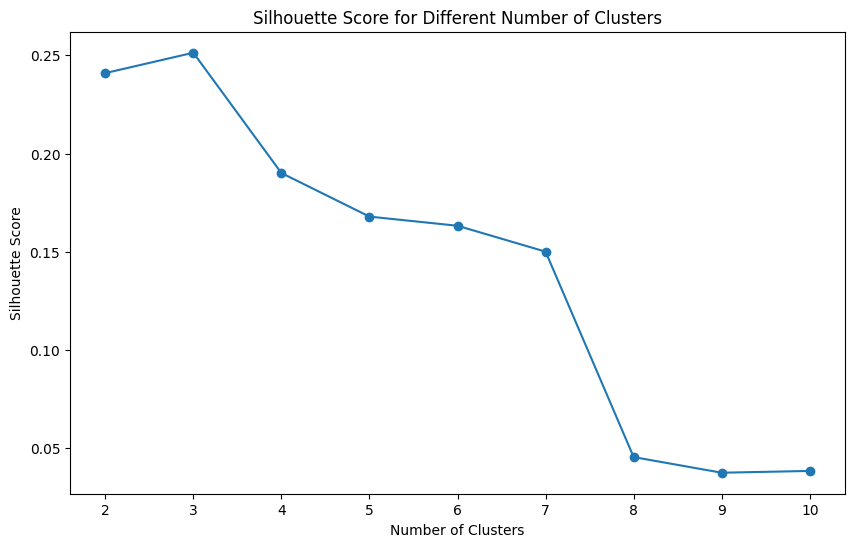

<Figure size 640x480 with 0 Axes>

In [84]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Initialize a list to store the silhouette scores
silhouette_scores_complete = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_complete, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_complete.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_complete, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11)) 
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering_complete.png')

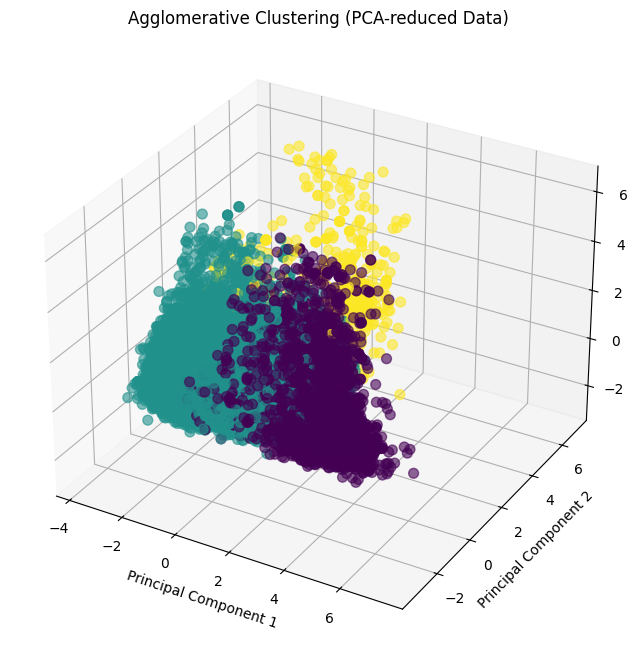

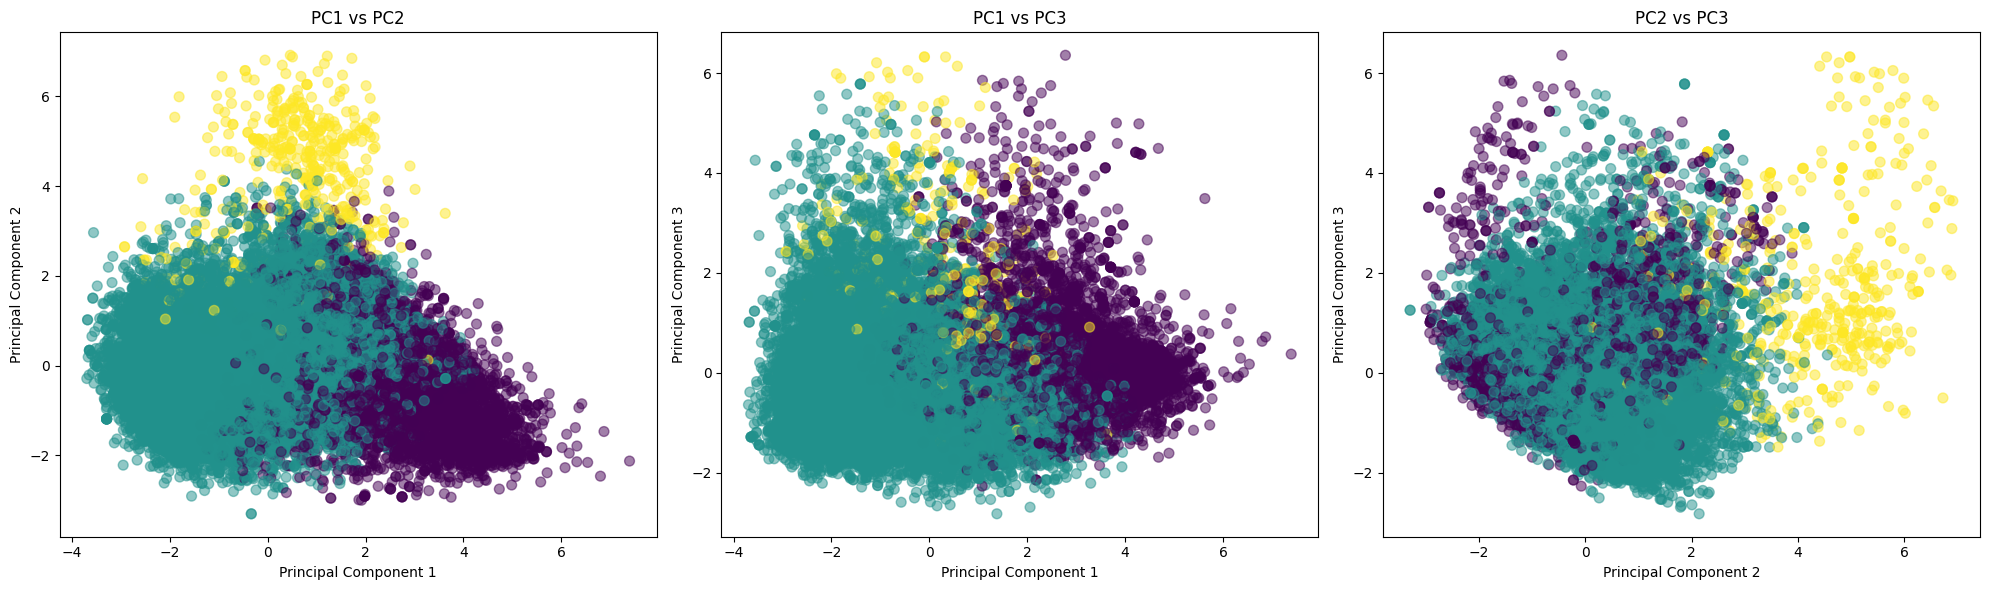

<Figure size 640x480 with 0 Axes>

In [85]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 3

# Performing Agglomerative Clustering with 'complete' linkage
agg_cluster_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agg_labels_complete = agg_cluster_complete.fit_predict(data_pca)  

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering_complete.png')


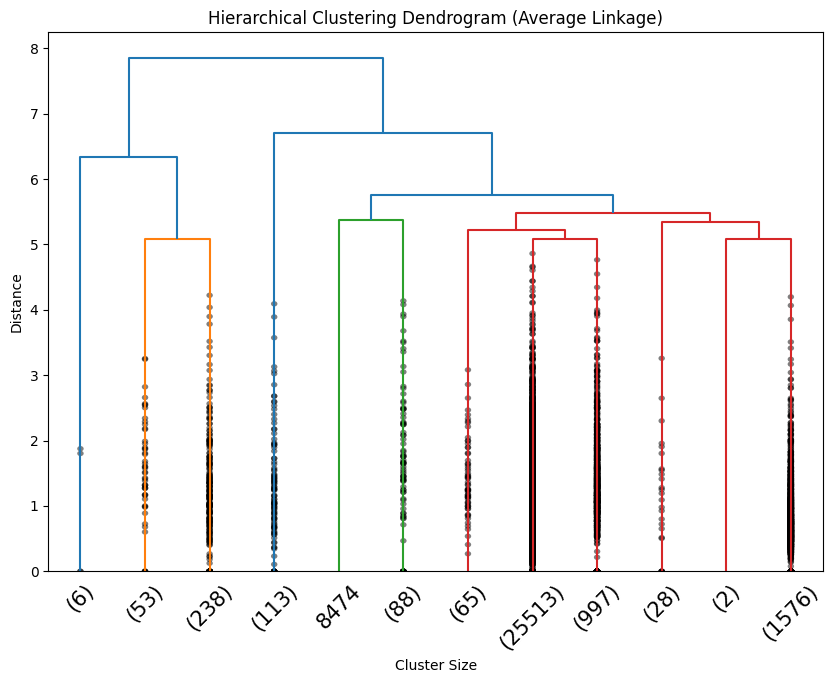

<Figure size 640x480 with 0 Axes>

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering with 'complete' linkage
Z_average = linkage(data_pca, method='average')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
dendrogram(Z_average, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram_average.png')

For n_clusters = 2, the silhouette score is: 0.4841832833104728
For n_clusters = 3, the silhouette score is: 0.3819830685971594
For n_clusters = 4, the silhouette score is: 0.3782585512087563
For n_clusters = 5, the silhouette score is: 0.28546117656150816
For n_clusters = 6, the silhouette score is: 0.2575997022897187
For n_clusters = 7, the silhouette score is: 0.2504011869804082
For n_clusters = 8, the silhouette score is: 0.2450567556413709
For n_clusters = 9, the silhouette score is: 0.19975194981206057
For n_clusters = 10, the silhouette score is: 0.1757432996281516


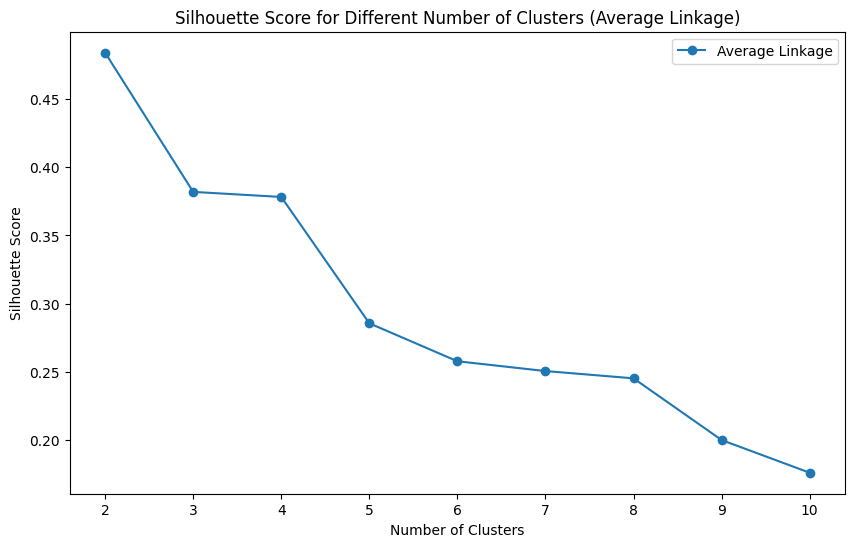

<Figure size 640x480 with 0 Axes>

In [87]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Initialize a list to store the silhouette scores
silhouette_scores_average = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_average, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_average.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_average, marker='o', label='Average Linkage')
plt.title('Silhouette Score for Different Number of Clusters (Average Linkage)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.legend()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering_average.png')

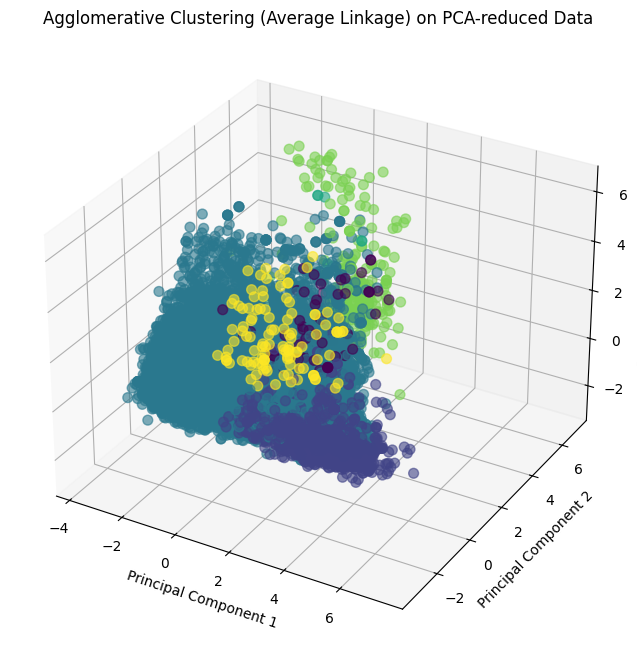

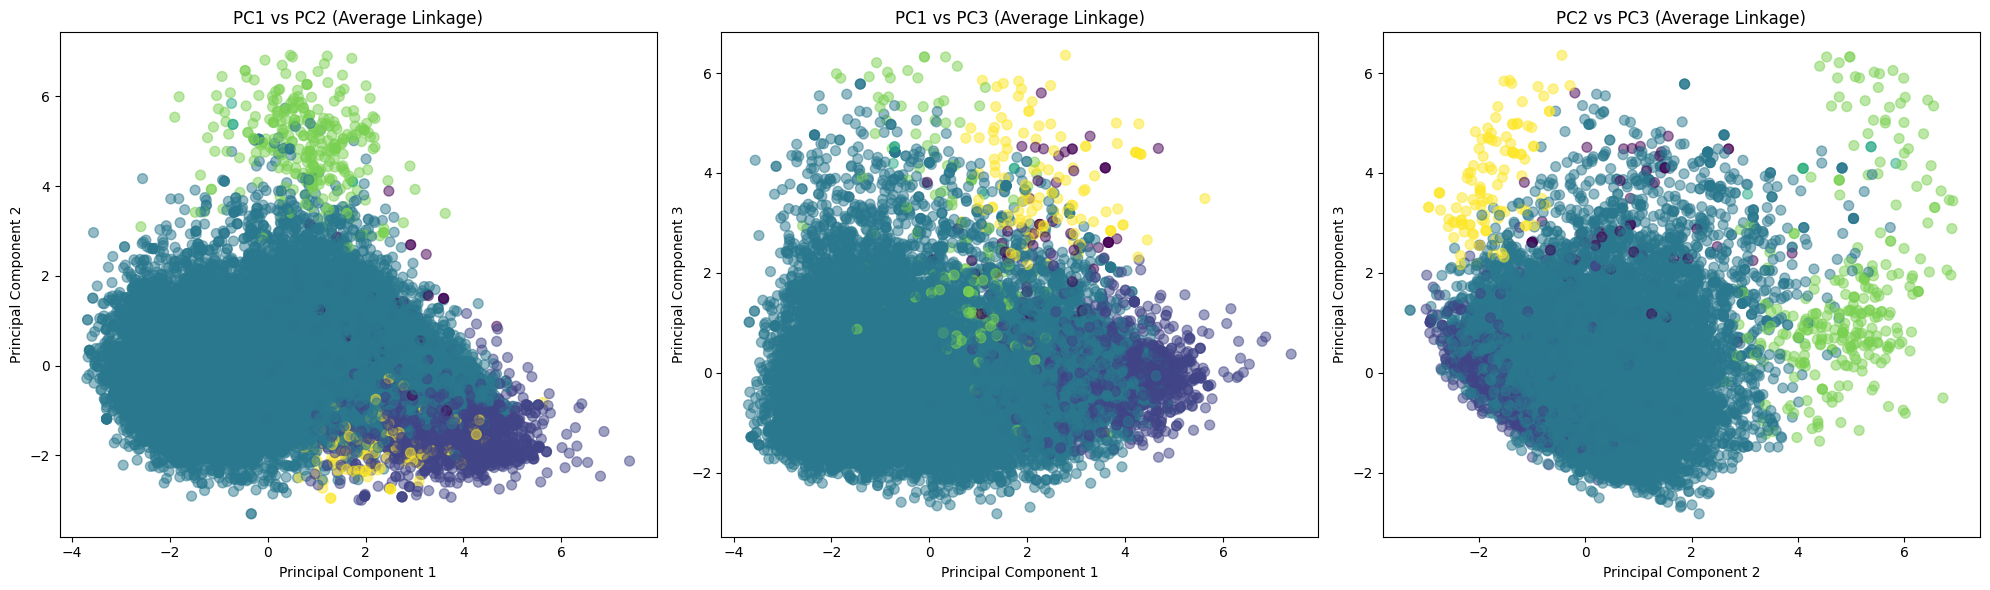

<Figure size 640x480 with 0 Axes>

In [88]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 6

# Performing Agglomerative Clustering with 'average' linkage
agg_cluster_avg = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agg_labels_avg = agg_cluster_avg.fit_predict(data_pca)  # Correctly using 'average' linkage results

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (Average Linkage) on PCA-reduced Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2 (Average Linkage)')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3 (Average Linkage)')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3 (Average Linkage)')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering_average.png')

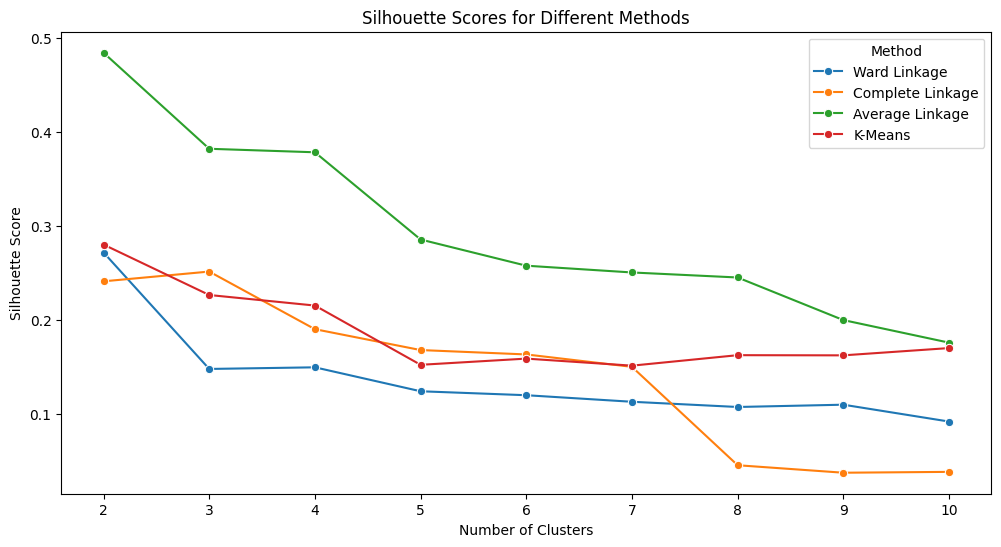

<Figure size 640x480 with 0 Axes>

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ward_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_ward})
complete_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_complete})
average_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_average})

# Combine all the scores into a single DataFrame
all_scores_df = pd.concat([ward_scores_df, complete_scores_df, average_scores_df], ignore_index=True)

# Add a column for the method
all_scores_df['Method'] = ['Ward Linkage'] * len(range_n_clusters) + ['Complete Linkage'] * len(range_n_clusters) + ['Average Linkage'] * len(range_n_clusters)

# Create a DataFrame for K-Means scores
kmeans_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_Kmeans})
kmeans_scores_df['Method'] = 'K-Means'

# Concatenate all DataFrames
all_scores_df = pd.concat([all_scores_df, kmeans_scores_df], ignore_index=True)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_scores_df, x='Number of Clusters', y='Silhouette Score', hue='Method', marker='o')

plt.title('Silhouette Scores for Different Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend(title='Method')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_scores_for_different_methods.png')

<Figure size 1200x800 with 0 Axes>

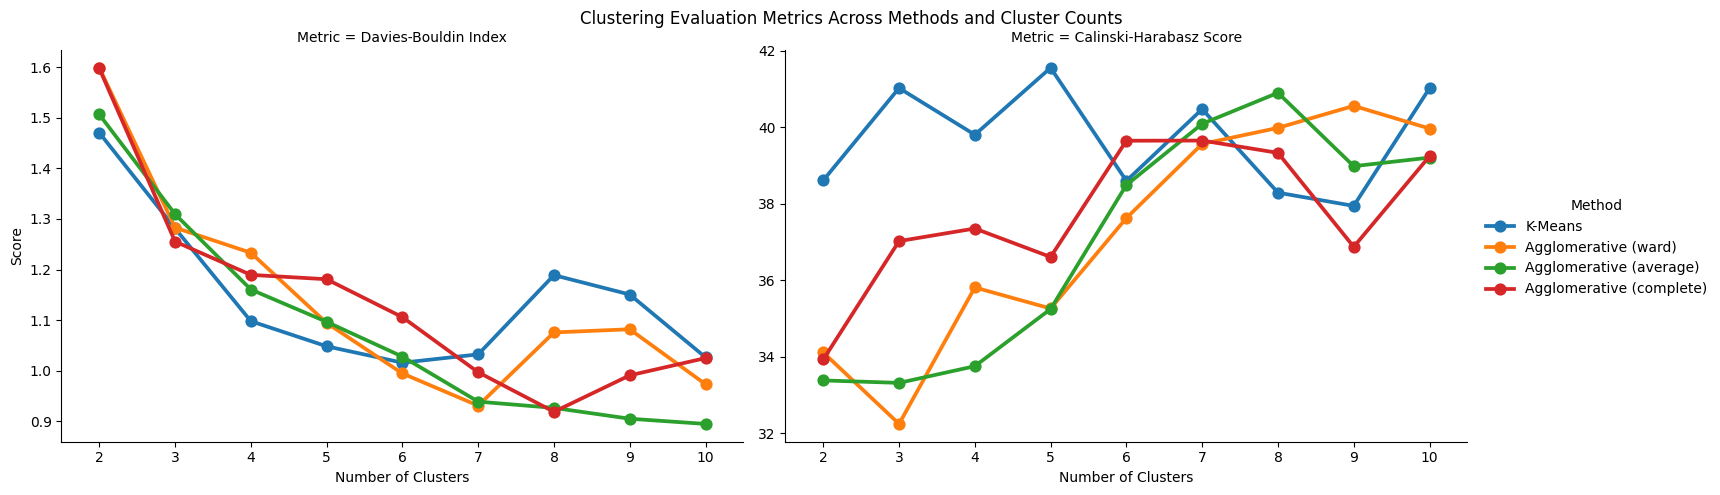

<Figure size 640x480 with 0 Axes>

In [69]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



def calculate_indices(data, cluster_labels):
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)
    return davies_bouldin, calinski_harabasz

results = []

# Define the range of cluster numbers to evaluate
cluster_range = range(2, 11)

# Evaluate K-Means
for n_clusters in cluster_range:
    kmeans_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(data_pca)
    db_index, ch_score = calculate_indices(data_pca, kmeans_labels)
    results.append({
        'Method': 'K-Means',
        'Number of Clusters': n_clusters,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Score': ch_score
    })

# Evaluate Agglomerative Clustering for each linkage type
linkages = ['ward', 'average', 'complete']
for linkage in linkages:
    for n_clusters in cluster_range:
        agg_labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(data_pca)
        db_index, ch_score = calculate_indices(data_pca, agg_labels)
        results.append({
            'Method': f'Agglomerative ({linkage})',
            'Number of Clusters': n_clusters,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Score': ch_score
        })

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Melt the DataFrame to make it suitable for sns.catplot
df_melted = results_df.melt(id_vars=['Method', 'Number of Clusters'], var_name='Metric', value_name='Score')

# Visualization
plt.figure(figsize=(12, 8))
sns.catplot(
    data=df_melted,
    x='Number of Clusters', y='Score', hue='Method', col='Metric',
    kind='point', col_wrap=2, height=5, aspect=1.5, marker='o', linestyles='-',
    sharey=False 
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Clustering Evaluation Metrics Across Methods and Cluster Counts')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/clustering_evaluation_metrics.png')

In [90]:
#save the results
results_df.to_csv('/Users/taief/Desktop/MusicTry/venv/clustering_evaluation_results.csv', index=False)